🚀 MEMULAI ANALISIS JEJAK KARBON HILIRISASI NIKEL INDONESIA 🚀

✅ Data berhasil dimuat dari 'C:/TUGAS_TRANSISI_ENERGI_HIJAU/data_emisi_nikel_indonesia.csv'.

--- Data yang Dibaca dari CSV ---
                             Tahap  Emisi_Konvensional  Emisi_Hijau
  1. Penambangan & Logistik Bijih"                 4.0          3.5
           2. Pengolahan Smelter "                18.0          5.0
3. Pemurnian menjadi Nikel Sulfat"                 3.0          1.5
   4. Produksi Prekursor & Katoda"                 2.5          1.0
  5. Distribusi ke Pabrik Baterai"                 0.5          0.4

Tekan Enter untuk melihat analisis rincian emisi konvensional...


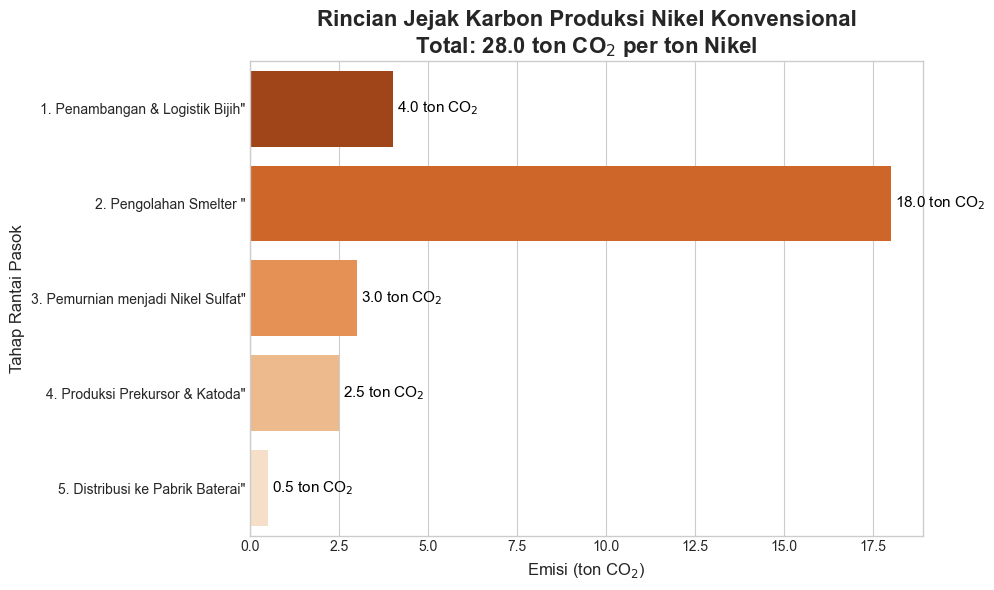


Tekan Enter untuk melihat perbandingan dengan skenario hijau...


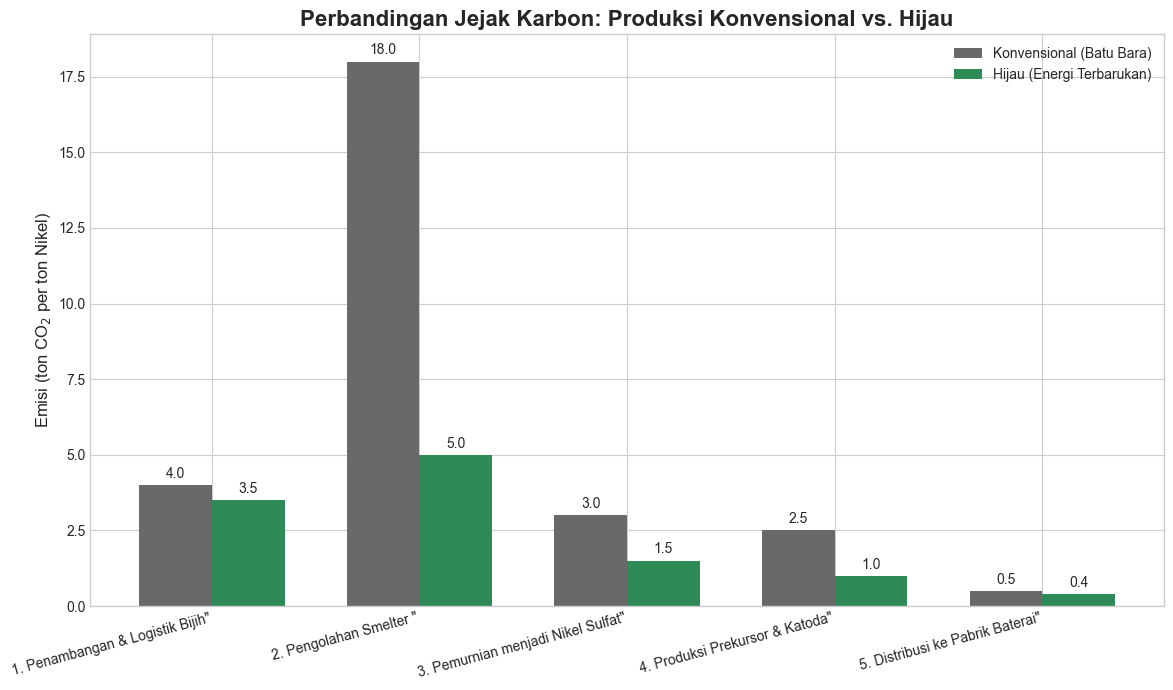


--- 📝 KESIMPULAN ANALISIS 📝 ---

1. Total Emisi Skenario Konvensional: 28.0 ton CO2 per ton nikel.
2. Kontributor Utama Emisi: Tahap 'Smelting' menyumbang porsi emisi terbesar karena ketergantungan pada PLTU batu bara.
3. Total Emisi Skenario Hijau: 11.4 ton CO2 per ton nikel.
4. Potensi Pengurangan Emisi: Transisi ke produksi hijau berpotensi mengurangi jejak karbon hingga 59.3%.

Analisis selesai. Transisi energi pada smelter adalah kunci untuk mencapai 'Nikel Hijau' Indonesia.


In [1]:
# Menyiapkan library yang kita butuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys  # (ini digunakan untuk menghentikan program jika file tidak ditemukan)

# 1. SETUP DATA (DIUBAH UNTUK MEMBACA CSV)
def siapkan_data_rantai_pasok(nama_filecsv):     #Teknik OOP python
    """
    Membaca data emisi rantai pasok dari sebuah file CSV.
    """
    try:
        # Menggunakan pandas untuk membaca file CSV
        df = pd.read_csv('C:/TUGAS_TRANSISI_ENERGI_HIJAU/data_emisi_nikel_indonesia.csv')
        print(f"✅ Data berhasil dimuat dari '{nama_filecsv}'.")
        return df
    except FileNotFoundError:
        # Pesan error yang lebih ramah jika file tidak ditemukan
        print(f"❌ ERROR: File '{nama_filecsv}' tidak ditemukan.")
        print("Pastikan file tersebut berada di folder yang sama dengan script Python ini.")
        return None  # Mengembalikan None jika gagal

# 2. ANALISIS SKENARIO KONVENSIONAL
def analisis_breakdown_konvensional(df):
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='Emisi_Konvensional', y='Tahap', data=df, hue='Tahap',
        palette='Oranges_r'
    )
    for i in ax.containers:
        ax.bar_label(i, fmt=r'%.1f ton CO$_2$', padding=3, fontsize=11, color='black')
    total_emisi = df['Emisi_Konvensional'].sum()
    plt.title(
        f'Rincian Jejak Karbon Produksi Nikel Konvensional\nTotal: {total_emisi:.1f} ton CO$_2$ per ton Nikel',
        fontsize=16, fontweight='bold'
    )
    plt.xlabel(r'Emisi (ton CO$_2$)', fontsize=12)
    plt.ylabel('Tahap Rantai Pasok', fontsize=12)
    plt.tight_layout()
    plt.show()

# 3. PERBANDINGAN SKENARIO
def bandingkan_skenario(df):
    tahapan = df['Tahap']
    emisi_konvensional = df['Emisi_Konvensional']
    emisi_hijau = df['Emisi_Hijau']
    x = np.arange(len(tahapan))
    width = 0.35
    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(x - width / 2, emisi_konvensional, width, label='Konvensional (Batu Bara)', color='dimgray')
    rects2 = ax.bar(x + width / 2, emisi_hijau, width, label='Hijau (Energi Terbarukan)', color='seagreen')
    ax.set_ylabel(r'Emisi (ton CO$_2$ per ton Nikel)', fontsize=12)
    ax.set_title('Perbandingan Jejak Karbon: Produksi Konvensional vs. Hijau', fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(tahapan, rotation=15, ha="right")
    ax.legend()
    ax.bar_label(rects1, padding=3, fmt='%.1f')
    ax.bar_label(rects2, padding=3, fmt='%.1f')
    fig.tight_layout()
    plt.show()

# 4. FUNGSI UTAMA    note : untuk memastikan bahwa kode di dalam blok tersebut hanya akan dijalankan jika file Python tersebut dijalankan secara langsung
if __name__ == "__main__":
    print("🚀 MEMULAI ANALISIS JEJAK KARBON HILIRISASI NIKEL INDONESIA 🚀\n")

    # Langkah 1: Siapkan data dari file CSV
    nama_filecsv = 'C:/TUGAS_TRANSISI_ENERGI_HIJAU/data_emisi_nikel_indonesia.csv'
    df_rantai_pasok = siapkan_data_rantai_pasok(nama_filecsv)

    # Memeriksa apakah data berhasil dimuat sebelum melanjutkan
    if df_rantai_pasok is None:
        sys.exit("Program dihentikan karena data tidak dapat dimuat.")  # Menghentikan program

    print("\n--- Data yang Dibaca dari CSV ---")
    print(df_rantai_pasok.to_string(index=False))
    total_konvensional = df_rantai_pasok['Emisi_Konvensional'].sum()
    total_hijau = df_rantai_pasok['Emisi_Hijau'].sum()
    penurunan_persen = ((total_konvensional - total_hijau) / total_konvensional) * 100

    print("\nTekan Enter untuk melihat analisis rincian emisi konvensional...")
    input()

    analisis_breakdown_konvensional(df_rantai_pasok)

    print("\nTekan Enter untuk melihat perbandingan dengan skenario hijau...")
    input()

    bandingkan_skenario(df_rantai_pasok)

    print("\n--- 📝 KESIMPULAN ANALISIS 📝 ---\n")
    print(f"1. Total Emisi Skenario Konvensional: {total_konvensional:.1f} ton CO2 per ton nikel.")
    print(f"2. Kontributor Utama Emisi: Tahap 'Smelting' menyumbang porsi emisi terbesar karena ketergantungan pada PLTU batu bara.")
    print(f"3. Total Emisi Skenario Hijau: {total_hijau:.1f} ton CO2 per ton nikel.")
    print(f"4. Potensi Pengurangan Emisi: Transisi ke produksi hijau berpotensi mengurangi jejak karbon hingga {penurunan_persen:.1f}%.")
    print("\nAnalisis selesai. Transisi energi pada smelter adalah kunci untuk mencapai 'Nikel Hijau' Indonesia.")